**INITIALIZATION:**

In [1]:
#@ IMPORTING NECESSARY PACKAGES AND LIBRARIES: 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#@ DEFINING SIGMOID ACTIVATION FUNCTION: 
def sigmoid_activation(x):
    return 1.0 / (1 + np.exp(-x))

#@ DEFINING PREDICT FUNCTION:
def predict(X, W):                                     # Defining Function. 
    preds = sigmoid_activation(X.dot(W))               # Initializing Dot Product. 
    preds[preds <= 0.5] = 0                            # Implementing Thresholds. 
    preds[preds > 0.5] = 1                             # Implementing Thresholds. 
    return preds                                       # Getting Predictions. 

**GETTING THE DATASET:**

In [3]:
#@ GETTING THE DATASET: 
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, 
                    cluster_std=1.5, random_state=42)           # Initializing Classification Dataset. 
y = y.reshape((y.shape[0], 1))                                  # Reshaping Dataset. 
X = np.c_[X, np.ones((X.shape[0]))]                             # Inserting Column Matrix. 
(trainX, testX, trainY, testY) = train_test_split(
    X, y, test_size=0.5, random_state=42)                       # Partitioning Dataset into Training and Testing. 

**GRADIENT DESCENT:**
- The gradient descent method is an iterative optimization algorithm that operates over a loss landscape also called and optimization surface. Also, gradient descent refers to the process of attempting to optimize the parameters for low loss and high classification accuracy via an iterative process of taking a step in the direction that minimize loss. 

In [4]:
#@ INITIALIZING PARAMETERS: 
print("[INFO] training...")
epochs, lr = 100, 0.01                                 # Initializing Epochs and LR. 
W = np.random.randn(X.shape[1], 1)                     # Initializing Weights. 
losses = []                                            # Initialization. 

#@ INITIALIZING GRADIENT DESCENT: 
for epoch in np.arange(0, epochs):
    preds = sigmoid_activation(trainX.dot(W))          # Initializing Sigmoid Activation.
    error = preds - trainY                             # Computing Error. 
    loss = np.sum(error**2)                            # Getting Loss. 
    losses.append(loss)
    gradient = trainX.T.dot(error)                     # Computing Gradient Descent. 
    W -= lr * gradient                                 # Updating Weight Matrices. 
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(
            int(epoch+1), loss))                       # Inspecting Updates. 

[INFO] training...
[INFO] epoch=1, loss=181.6551850
[INFO] epoch=5, loss=11.0790989
[INFO] epoch=10, loss=4.7123674
[INFO] epoch=15, loss=3.9108743
[INFO] epoch=20, loss=3.2270318
[INFO] epoch=25, loss=3.0041717
[INFO] epoch=30, loss=2.9968519
[INFO] epoch=35, loss=2.9796168
[INFO] epoch=40, loss=2.8799078
[INFO] epoch=45, loss=2.5031819
[INFO] epoch=50, loss=2.0144460
[INFO] epoch=55, loss=1.6651396
[INFO] epoch=60, loss=1.2531308
[INFO] epoch=65, loss=0.8683436
[INFO] epoch=70, loss=0.5949054
[INFO] epoch=75, loss=0.4103968
[INFO] epoch=80, loss=0.2866717
[INFO] epoch=85, loss=0.2043442
[INFO] epoch=90, loss=0.1495122
[INFO] epoch=95, loss=0.1126417
[INFO] epoch=100, loss=0.0875429


In [5]:
#@ MODEL EVALUATION: 
print("[INFO] evaluating...")
preds = predict(testX, W)                       # Getting Predictions. 
print(classification_report(testY, preds))      # Inspecting Classification Report. 

[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       248

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



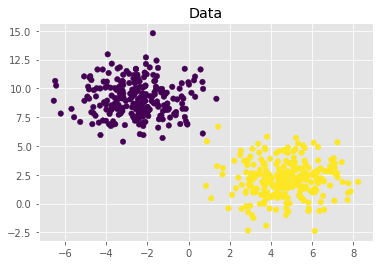

In [9]:
#@ INSPECTING CLASSIFICATION DATA: 
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY, s=30)
plt.show();

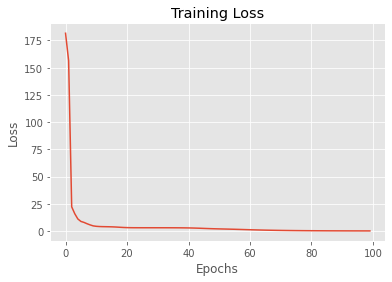

In [10]:
#@ INSPECTING LOSS:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show();